# Introduction to Machine Learning with mNGS Data
This notebook is part of a workshop for biologists to explore the basics of machine learning using a toy metagenomic next-generation sequencing (mNGS) dataset. We will start with basic data visualizations and proceed to build simple machine learning models like linear regression and random forests.

## Step 1: Load the Dataset

In [1]:
import pandas as pd

# Load the toy mNGS dataset
url = 'relative_abundance_large_data.csv'
data = pd.read_csv(url, index_col=0)

# Display the first few rows of the dataset
data.head()


,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Species_7,Species_8,Species_9,Species_10,Species_11,Species_12,Species_13,Species_14,Species_15,Sample_Class
Sample_1,0.053719,0.096074,0.015496,0.074380,0.063017,0.021694,0.085744,0.089876,0.077479,0.077479,0.181818,0.024793,0.006198,0.022727,0.109504,Disease
Sample_2,0.002081,0.091571,0.031217,0.039542,0.002081,0.066597,0.062435,0.021852,0.034339,0.079084,0.120708,0.022893,0.185224,0.050989,0.189386,Disease
Sample_3,0.060762,0.043254,0.094748,0.061792,0.082389,0.015448,0.063852,0.063852,0.048404,0.063852,0.105046,0.056643,0.131823,0.003090,0.105046,Disease
Sample_4,0.008343,0.025030,0.087008,0.046484,0.021454,0.004768,0.106079,0.071514,0.016687,0.010727,0.214541,0.063170,0.004768,0.100119,0.219309,Disease
Sample_5,0.101010,0.119529,0.074074,0.013468,0.079125,0.058923,0.131313,0.136364,0.060606,0.084175,0.013468,0.003367,0.020202,0.090909,0.013468,Disease


First let's check that this is indeed a relative abundance table

In [2]:
# Check if rows sum to 1
row_sums = data.sum(axis=1)  # Sum values along the row axis

# Display the row sums
print("Row Sums:")
print(row_sums)

Row Sums:
Sample_1      1.0
Sample_2      1.0
Sample_3      1.0
Sample_4      1.0
Sample_5      1.0
             ... 
Sample_96     1.0
Sample_97     1.0
Sample_98     1.0
Sample_99     1.0
Sample_100    1.0
Length: 100, dtype: float64


## Step 2: Basic Data Visualizations

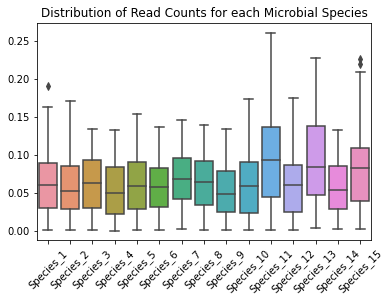

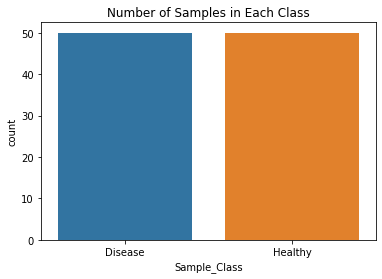

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of read counts for each species
sns.boxplot(data=data.drop(columns=['Sample_Class']))
plt.title('Distribution of Read Counts for each Microbial Species')
plt.xticks(rotation=45)
plt.show()

# Visualize the number of samples in each class
sns.countplot(x='Sample_Class', data=data)
plt.title('Number of Samples in Each Class')
plt.show()


Question: Why is it important to check sample class?

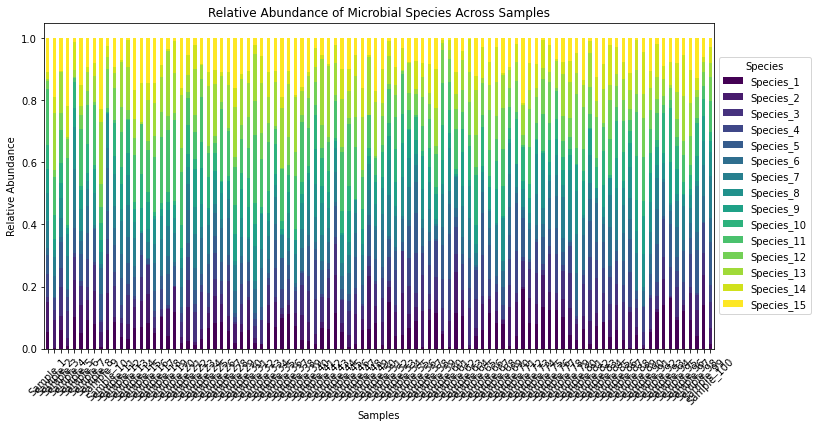

In [4]:
# Stacked Bar Chart: Relative Abundance of Species Across Samples
data.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')

# Customize the plot
plt.title('Relative Abundance of Microbial Species Across Samples')
plt.xlabel('Samples')
plt.ylabel('Relative Abundance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Species')
plt.xticks(rotation=45)


# Show the plot
plt.show()

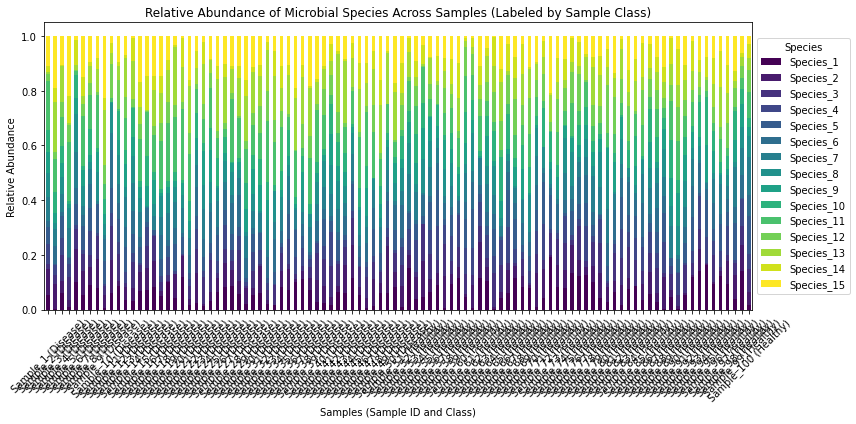

In [5]:
# Generate the bar plot with class labels on the x-axis
# Group samples by their class labels for clearer visualization
sample_labels = data['Sample_Class']

# Create a stacked bar plot with class labels for each sample
data.drop(columns=['Sample_Class']).plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')

# Set custom x-tick labels to show both sample ID and class
plt.xticks(ticks=range(len(sample_labels)), labels=[f"{sample} ({label})" for sample, label in zip(data.index, sample_labels)], rotation=45)

# Customize the plot
plt.title('Relative Abundance of Microbial Species Across Samples (Labeled by Sample Class)')
plt.xlabel('Samples (Sample ID and Class)')
plt.ylabel('Relative Abundance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Species')
plt.tight_layout()

# Show the plot
plt.show()

## Step 3: Logistic Regression

We will build a simple logistic regression model to predict the disease status based on the relative abundances

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode 'Sample_Class' to numerical values: 'Disease' = 1, 'Healthy' = 0
data['Sample_Class'] = data['Sample_Class'].map({'Healthy': 0, 'Disease': 1})

# Separate features and target variable
X = data.drop(columns=['Sample_Class'])  # Features: relative abundances of species
y = data['Sample_Class']  # Target: encoded class label

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.60
Confusion Matrix:
[[8 0]
 [8 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.33      0.50        12

    accuracy                           0.60        20
   macro avg       0.75      0.67      0.58        20
weighted avg       0.80      0.60      0.57        20



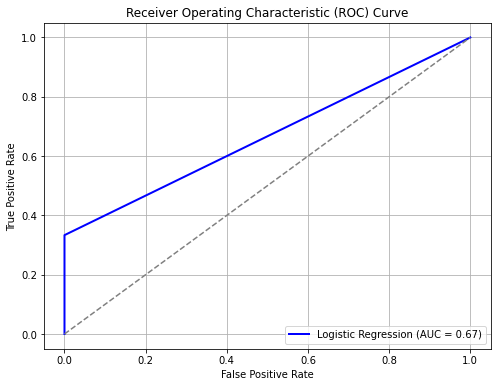

In [7]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Step 4: Random Forest Classification

Next, we will build a Random Forest classifier to predict whether a sample is 'Disease' or 'Healthy' based on the microbial read counts.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = data.drop(columns=['Sample_Class'])  # Features: relative abundances of species
y = data['Sample_Class']  # Target: encoded class label

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Disease)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 0.70
Confusion Matrix:
[[6 2]
 [4 8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.80      0.67      0.73        12

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



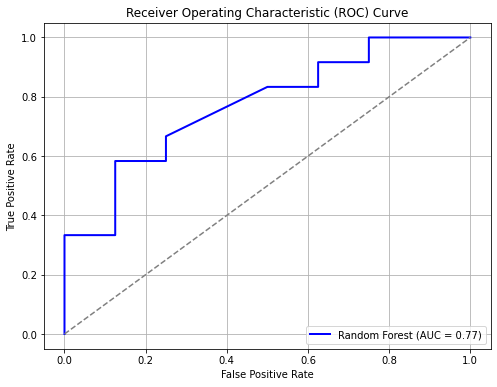

In [9]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Step 5: Explainability

In [10]:
import numpy as np

# 1. Display the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]
features = X.columns

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort features by absolute coefficient value to see which ones drive the model most
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print(feature_importance_df[['Feature', 'Coefficient']])

Feature Importance (Logistic Regression Coefficients):
       Feature  Coefficient
12  Species_13     1.046494
10  Species_11     1.030593
14  Species_15     0.839473
11  Species_12    -0.645406
3    Species_4    -0.585758
13  Species_14    -0.442774
9   Species_10    -0.316600
0    Species_1    -0.261401
8    Species_9    -0.245118
4    Species_5    -0.175297
6    Species_7    -0.158691
1    Species_2     0.103533
5    Species_6    -0.102399
7    Species_8    -0.060709
2    Species_3    -0.026002


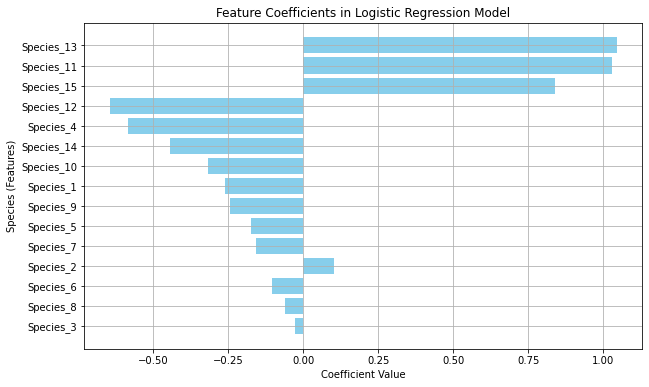

In [11]:
# 2. Plot the coefficients to visualize their importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Species (Features)')
plt.title('Feature Coefficients in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to show largest coefficient on top
plt.grid(True)
plt.show()

We can try getting a more objective idea about how our model performs on unseen data through leave-one-out cross-validation

In [12]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()
y_true = []
y_pred = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the logistic regression model on the training data
    logreg_model.fit(X_train, y_train)
    
    # Predict the class label for the left-out sample
    y_pred.append(logreg_model.predict(X_test)[0])
    y_true.append(y_test.values[0])

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate ROC AUC score (requires probabilities)
y_prob = [logreg_model.predict_proba(X.iloc[[i]])[0][1] for i in range(len(X))]  # Get probabilities for the positive class (Disease)
roc_auc = roc_auc_score(y_true, y_prob)

# Print the results
print(f"Leave-One-Out Cross-Validation Accuracy: {accuracy:.2f}")
print(f"Leave-One-Out Cross-Validation ROC AUC Score: {roc_auc:.2f}")

Leave-One-Out Cross-Validation Accuracy: 0.80
Leave-One-Out Cross-Validation ROC AUC Score: 0.91


## Step 6: Your turn

Use the data in relative_abundance_large_data.csv to try to build a machine learning model and explain it